In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

In [55]:
# First, read the table airline_expenses.csv, name this table df1

df1 = pd.read_csv(r"D:\Practice Projects\MIT Airline Project\airline_expenses.csv")

In [56]:
df1

,Year,American,Continental,Delta,Northwest,United,US Airways,America West,--sub Network,Southwest,...,Frontier,Virgin America,-- sub LCC,Alaska,Hawaiian,Spirit,Allegiant,-- sub Other,Total All Sectors,Total Industry
0,1995,1.464238e+10,4.680825e+09,1.151885e+10,7.998622e+09,1.406282e+10,6.750225e+09,1.407116e+09,6.106084e+10,2.564934e+09,...,6.442842e+07,0.000000e+00,2.629362e+09,1.090454e+09,3.489645e+08,4.914481e+07,0.000000e+00,1.488563e+09,6.517877e+10,8.845453e+10
1,1996,1.380516e+10,5.092729e+09,1.274658e+10,8.643457e+09,1.518652e+10,7.335389e+09,1.683147e+09,6.449299e+10,3.057632e+09,...,1.184010e+08,0.000000e+00,3.176033e+09,1.225930e+09,3.825622e+08,6.616254e+07,0.000000e+00,1.674655e+09,6.934367e+10,9.572828e+10
2,1997,1.440879e+10,5.716169e+09,1.258266e+10,8.780475e+09,1.610968e+10,7.915335e+09,1.724562e+09,6.723767e+10,3.292675e+09,...,1.578754e+08,0.000000e+00,3.568569e+09,1.324356e+09,4.023922e+08,7.923607e+07,0.000000e+00,1.805984e+09,7.261223e+10,1.009825e+11
3,1998,1.455046e+10,6.638851e+09,1.283668e+10,8.836084e+09,1.608235e+10,7.565643e+09,1.785128e+09,6.829521e+10,3.480321e+09,...,1.823197e+08,0.000000e+00,4.043967e+09,1.386311e+09,4.091304e+08,1.228680e+08,0.000000e+00,1.918309e+09,7.425748e+10,1.037639e+11
4,1999,1.508649e+10,7.546106e+09,1.317130e+10,9.099249e+09,1.660877e+10,8.258020e+09,1.966086e+09,7.173603e+10,3.954116e+09,...,2.661407e+08,0.000000e+00,4.667978e+09,1.518904e+09,5.293505e+08,2.321437e+08,0.000000e+00,2.280398e+09,7.868440e+10,1.104889e+11
5,2000,1.687413e+10,8.542461e+09,1.386150e+10,1.029311e+10,1.859045e+10,9.225611e+09,2.322064e+09,7.970932e+10,4.629120e+09,...,3.695501e+08,0.000000e+00,5.661697e+09,1.772242e+09,6.212017e+08,3.099643e+08,0.000000e+00,2.703408e+09,8.807443e+10,1.232334e+11
6,2001,1.819660e+10,8.313431e+09,1.418318e+10,1.038840e+10,1.983047e+10,9.434777e+09,2.458870e+09,8.280572e+10,4.924054e+09,...,4.265764e+08,0.000000e+00,6.245398e+09,1.827846e+09,6.260781e+08,3.653006e+08,0.000000e+00,2.819225e+09,9.187035e+10,1.255518e+11
7,2002,1.918353e+10,7.833538e+09,1.344578e+10,9.935075e+09,1.693741e+10,7.834254e+09,2.185147e+09,7.735474e+10,5.104270e+09,...,4.727129e+08,0.000000e+00,6.808838e+09,1.913172e+09,6.870523e+08,4.112668e+08,0.000000e+00,3.011491e+09,8.717507e+10,1.156874e+11
8,2003,1.884734e+10,7.303747e+09,1.536021e+10,9.460358e+09,1.495148e+10,7.182984e+09,2.199475e+09,7.530559e+10,5.454619e+09,...,5.651266e+08,0.000000e+00,7.680666e+09,2.037996e+09,6.457075e+08,4.427857e+08,0.000000e+00,3.126489e+09,8.611275e+10,1.198660e+11
9,2004,1.902856e+10,1.014088e+10,1.676721e+10,1.169960e+10,1.686757e+10,7.421065e+09,2.485128e+09,8.441003e+10,5.976038e+09,...,8.242023e+08,0.000000e+00,8.961662e+09,2.279675e+09,7.088630e+08,5.357287e+08,9.560003e+07,3.619867e+09,9.699156e+10,1.361119e+11


In [70]:
# Read the second table airline_passengers.csv, name it df2

df2 = pd.read_csv(r"D:\Practice Projects\MIT Airline Project\airline_passengers.csv")

In [71]:
df2

,Year,American,Continental,Delta,Northwest,United,US Airways,America West,--sub Network,Southwest,...,AirTran,Frontier,Virgin America,--sub LCC,Alaska,Hawaiian,Spirit,Allegiant,-- sub Other,Total All Sectors
0,1995,79567182.0,35284189.0,86963085.0,49370005.0,78807932.0,57035260.0,16848329.0,403875982.0,50151362.0,...,497599.0,611451.0,0.0,51260412.0,10139128.0,4926466.0,678005.0,0.0,15743599.0,470879993.0
1,1996,79387628.0,35984116.0,97268562.0,52722136.0,81944830.0,56894285.0,18178063.0,422379620.0,55490793.0,...,1075371.0,1283378.0,0.0,57849542.0,11804938.0,5340302.0,750007.0,0.0,17895247.0,498124409.0
2,1997,81138330.0,38965779.0,103207867.0,54704317.0,84247098.0,58814445.0,18331351.0,439409187.0,51669196.0,...,1085288.0,1278127.0,0.0,54032611.0,12283258.0,5188656.0,1093321.0,0.0,18565235.0,512007033.0
3,1998,81476833.0,41691408.0,103724605.0,50538811.0,86868185.0,58094384.0,17791959.0,440186185.0,59177010.0,...,4589806.0,1529975.0,0.0,65296791.0,13055941.0,5264589.0,1551130.0,0.0,19871660.0,525354636.0
4,1999,81507894.0,44012311.0,105529015.0,54764430.0,86580996.0,55892647.0,18703566.0,446990859.0,65485500.0,...,6457696.0,2176024.0,0.0,74119220.0,13619767.0,5692040.0,2496165.0,0.0,21807972.0,542918051.0
5,2000,86382135.0,45409245.0,105709077.0,56927032.0,83913300.0,59830431.0,19954018.0,458125238.0,72710320.0,...,7547350.0,2892792.0,0.0,84278608.0,13524685.0,6271183.0,3221261.0,129687.0,23146816.0,565550662.0
6,2001,78178705.0,42780215.0,94179938.0,52373970.0,75181720.0,56148005.0,19594293.0,418436846.0,73742879.0,...,8302732.0,2997968.0,0.0,88099950.0,13667470.0,5830409.0,3274123.0,67157.0,22839159.0,529375955.0
7,2002,94130352.0,40009089.0,90924099.0,51827440.0,68494278.0,47167584.0,19451122.0,412003964.0,72515950.0,...,9660141.0,3737673.0,0.0,91586402.0,14153286.0,5861320.0,3686807.0,189406.0,23890819.0,527481185.0
8,2003,88888929.0,38936200.0,84246369.0,51975656.0,66101151.0,41264287.0,20048414.0,391461006.0,74788288.0,...,11657851.0,5071163.0,0.0,100467046.0,15070339.0,5682956.0,4110592.0,485467.0,25349354.0,517277406.0
9,2004,91619665.0,40745993.0,86901935.0,55446115.0,70880444.0,42408295.0,21132430.0,409134877.0,81150157.0,...,13178118.0,6437921.0,0.0,112497929.0,16294555.0,5612859.0,4592640.0,841110.0,27341164.0,548973970.0


In [80]:
# Read the third table airline_revenues.csv, name it df3

df3 = pd.read_csv(r"D:\Practice Projects\MIT Airline Project\airline_revenues.csv")

In [81]:
df3

,Year,American,Continental,Delta,Northwest,United,US Airways,America West,--sub Network,Southwest,...,Frontier,Virgin America,-- sub LCC,Alaska,Hawaiian,Spirit,Allegiant,-- sub Other,Total All Sectors,Total Industry
0,1995,1.561020e+10,4.919025e+09,1.255728e+10,8.908851e+09,1.489476e+10,6.984876e+09,1.561849e+09,6.543684e+10,2.873482e+09,...,5.585034e+07,0.000000e+00,2.929332e+09,1.162878e+09,3.469040e+08,5.361167e+07,0.000000e+00,1.563394e+09,6.992956e+10,9.431793e+10
1,1996,1.513600e+10,5.487150e+09,1.331769e+10,9.751383e+09,1.631675e+10,7.704057e+09,1.751813e+09,6.946485e+10,3.407361e+09,...,1.095114e+08,0.000000e+00,3.516872e+09,1.306621e+09,3.844728e+08,6.274217e+07,0.000000e+00,1.753836e+09,7.473556e+10,1.019373e+11
2,1997,1.585580e+10,6.360742e+09,1.420394e+10,9.983693e+09,1.733518e+10,8.501485e+09,1.887135e+09,7.412798e+10,3.816997e+09,...,1.383232e+08,0.000000e+00,4.060918e+09,1.457429e+09,4.042164e+08,8.108587e+07,0.000000e+00,1.942731e+09,8.013163e+10,1.095676e+11
3,1998,1.629885e+10,7.298958e+09,1.462982e+10,8.706718e+09,1.751754e+10,8.555664e+09,1.982974e+09,7.499053e+10,4.164040e+09,...,1.923188e+08,0.000000e+00,4.725605e+09,1.581276e+09,4.264152e+08,1.305631e+08,0.000000e+00,2.138254e+09,8.185439e+10,1.131051e+11
4,1999,1.609026e+10,8.026597e+09,1.490135e+10,9.868061e+09,1.796670e+10,8.460361e+09,2.163986e+09,7.747732e+10,4.735648e+09,...,3.074870e+08,0.000000e+00,5.566603e+09,1.695591e+09,4.888762e+08,2.270956e+08,0.000000e+00,2.411563e+09,8.545549e+10,1.188920e+11
5,2000,1.811712e+10,9.129295e+09,1.532085e+10,1.095664e+10,1.933128e+10,9.181238e+09,2.309326e+09,8.434575e+10,5.649621e+09,...,4.506102e+08,0.000000e+00,6.829574e+09,1.759867e+09,6.072204e+08,3.122368e+08,0.000000e+00,2.679324e+09,9.385465e+10,1.302482e+11
6,2001,1.563879e+10,7.971663e+09,1.321119e+10,9.591793e+09,1.608737e+10,8.253356e+09,2.035474e+09,7.278964e+10,5.555235e+09,...,4.466522e+08,0.000000e+00,6.987464e+09,1.763063e+09,6.115829e+08,3.751925e+08,0.000000e+00,2.749838e+09,8.252694e+10,1.152270e+11
7,2002,1.587062e+10,7.352780e+09,1.241040e+10,9.151583e+09,1.391560e+10,6.914919e+09,2.020997e+09,6.763689e+10,5.521829e+09,...,4.646155e+08,0.000000e+00,7.355006e+09,1.832391e+09,6.320380e+08,4.043438e+08,0.000000e+00,2.868773e+09,7.786067e+10,1.071246e+11
8,2003,1.740332e+10,7.333412e+09,1.420303e+10,9.183813e+09,1.339773e+10,6.761645e+09,2.223348e+09,7.050630e+10,5.936696e+09,...,5.900627e+08,0.000000e+00,8.443149e+09,2.027376e+09,7.061443e+08,4.500667e+08,0.000000e+00,3.183587e+09,8.213304e+10,1.177680e+11
9,2004,1.860755e+10,9.851366e+09,1.515448e+10,1.126561e+10,1.570117e+10,7.073132e+09,2.481516e+09,8.013482e+10,6.529620e+09,...,7.872274e+08,0.000000e+00,9.624241e+09,2.241387e+09,7.846872e+08,4.832663e+08,1.019464e+08,3.611287e+09,9.337035e+10,1.346218e+11


In [33]:
# Read the forth table all_data.csv, name it df4

df4 = pd.read_csv(r"D:\Practice Projects\MIT Airline Project\all_data.csv")

In [34]:
df4

,Year,Total Operating Revenue ($),System Passenger Revenue ($),System Total Transport Related Revenue ($),System Passenger Revenue per ASM ($),System Revenue Per ASM (exc-transport) ($ per ASM),System Passenger Yield ($ per RPM),Ancillary Fees ($),International ASM,Internation ASM as % of total ASM,...,Pilot and Co-Pilot equivalents,Average Pilot and Co-Pilot wages ($),Flight Attendant Employee Equivalents,Average Flight Attendant Employee Wage ($),Ground Staff Employee Equivalents,Average Ground Staff Employee Wage ($),Maintenance Staff Equivalents,Average Maintenance Staff Wage ($),Management and Others Equivalents,Average Management and Others Wage ($)
0,1995,9.431793e+10,6.946997e+10,1.065288e+10,8.556012e+09,0.091464,0.126784,1.284640e+08,2.101305e+11,25.197862,...,42696.0,122484.029886,76454.0,32246.667800,149581.0,36474.433584,37391.0,53069.757161,75561.0,38799.775989
1,1996,1.019373e+11,7.528566e+10,1.097652e+10,8.980873e+09,0.095771,0.128285,1.282204e+08,2.141017e+11,25.235084,...,43045.0,125634.086189,76879.0,34402.156506,152266.0,36834.500545,34288.0,59397.297014,73171.0,40747.467395
2,1997,1.095676e+11,7.947079e+10,1.320868e+10,9.175647e+09,0.098067,0.129320,1.327321e+08,2.225720e+11,25.809566,...,45652.0,128212.966354,76607.0,37316.709700,149331.0,39099.594793,49976.0,49821.084721,65920.0,46135.603390
3,1998,1.131051e+11,8.098523e+10,1.442683e+10,9.100972e+09,0.097153,0.127975,1.284463e+09,2.297577e+11,26.520845,...,46719.0,127623.502001,85897.0,34348.870158,141645.0,40935.363691,51989.0,49170.503376,66325.0,43859.616919
4,1999,1.188920e+11,8.431750e+10,1.540106e+10,8.971640e+09,0.095805,0.125985,1.391577e+09,2.357971e+11,26.208102,...,54081.0,122143.948152,99197.0,33271.616279,159981.0,40796.831686,55778.0,48108.056761,75808.0,46046.625500
5,2000,1.302482e+11,9.363855e+10,1.525881e+10,9.631454e+09,0.102369,0.132280,1.491737e+09,2.469238e+11,26.962752,...,55044.0,132294.672989,102753.0,31738.790108,164998.0,41258.656105,54902.0,54448.473826,80398.0,55971.938297
6,2001,1.152270e+11,8.094318e+10,1.478082e+10,8.573544e+09,0.091511,0.121657,1.444634e+09,2.389054e+11,27.018093,...,54423.0,141266.638737,99598.0,35924.380911,159879.0,41230.903433,49324.0,62432.328481,81184.0,58826.388638
7,2002,1.071246e+11,7.335185e+10,1.348874e+10,8.163663e+09,0.087478,0.112933,1.732932e+09,2.191512e+11,25.467540,...,51202.0,145441.257177,92143.0,39510.379736,161977.0,40592.468499,49045.0,65643.513304,71117.0,55602.357311
8,2003,1.177680e+11,7.734213e+10,1.575506e+10,8.361785e+09,0.092776,0.112712,3.760744e+09,2.118331e+11,24.999670,...,47641.0,141392.999937,83399.0,39752.249188,143854.0,41796.528564,46826.0,59406.601461,63974.0,49262.867588
9,2004,1.346218e+11,8.569675e+10,2.291443e+10,8.459621e+09,0.092436,0.110810,3.108442e+09,2.348554e+11,25.990441,...,45461.0,146832.068366,82981.0,40940.404189,147170.0,38178.446626,43905.0,60751.278442,56865.0,56202.985482


In [35]:
# Read the fifth table industry_totals.csv, name it df5

df5 = pd.read_csv(r"D:\Practice Projects\MIT Airline Project\industry_totals.csv")

In [36]:
df5

,Year,Total Operating Revenue ($),System Passenger Revenue ($),System Total Transport Related Revenue ($),System Passenger Revenue per ASM ($),System Revenue Per ASM (exc-transport) ($ per ASM),System Passenger Yield ($ per RPM),Ancillary Fees ($),International ASM,Internation ASM as % of total ASM,...,Pilot and Co-Pilot equivalents,Average Pilot and Co-Pilot wages ($),Flight Attendant Employee Equivalents,Average Flight Attendant Employee Wage ($),Ground Staff Employee Equivalents,Average Ground Staff Employee Wage ($),Maintenance Staff Equivalents,Average Maintenance Staff Wage ($),Management and Others Equivalents,Average Management and Others Wage ($)
0,1995,9.431793e+10,6.946997e+10,1.065288e+10,8.556012e+09,0.091464,0.126784,1.284640e+08,2.101305e+11,25.197862,...,42696.0,122484.029886,76454.0,32246.667800,149581.0,36474.433584,37391.0,53069.757161,75561.0,38799.775989
1,1996,1.019373e+11,7.528566e+10,1.097652e+10,8.980873e+09,0.095771,0.128285,1.282204e+08,2.141017e+11,25.235084,...,43045.0,125634.086189,76879.0,34402.156506,152266.0,36834.500545,34288.0,59397.297014,73171.0,40747.467395
2,1997,1.095676e+11,7.947079e+10,1.320868e+10,9.175647e+09,0.098067,0.129320,1.327321e+08,2.225720e+11,25.809566,...,45652.0,128212.966354,76607.0,37316.709700,149331.0,39099.594793,49976.0,49821.084721,65920.0,46135.603390
3,1998,1.131051e+11,8.098523e+10,1.442683e+10,9.100972e+09,0.097153,0.127975,1.284463e+09,2.297577e+11,26.520845,...,46719.0,127623.502001,85897.0,34348.870158,141645.0,40935.363691,51989.0,49170.503376,66325.0,43859.616919
4,1999,1.188920e+11,8.431750e+10,1.540106e+10,8.971640e+09,0.095805,0.125985,1.391577e+09,2.357971e+11,26.208102,...,54081.0,122143.948152,99197.0,33271.616279,159981.0,40796.831686,55778.0,48108.056761,75808.0,46046.625500
5,2000,1.302482e+11,9.363855e+10,1.525881e+10,9.631454e+09,0.102369,0.132280,1.491737e+09,2.469238e+11,26.962752,...,55044.0,132294.672989,102753.0,31738.790108,164998.0,41258.656105,54902.0,54448.473826,80398.0,55971.938297
6,2001,1.152270e+11,8.094318e+10,1.478082e+10,8.573544e+09,0.091511,0.121657,1.444634e+09,2.389054e+11,27.018093,...,54423.0,141266.638737,99598.0,35924.380911,159879.0,41230.903433,49324.0,62432.328481,81184.0,58826.388638
7,2002,1.071246e+11,7.335185e+10,1.348874e+10,8.163663e+09,0.087478,0.112933,1.732932e+09,2.191512e+11,25.467540,...,51202.0,145441.257177,92143.0,39510.379736,161977.0,40592.468499,49045.0,65643.513304,71117.0,55602.357311
8,2003,1.177680e+11,7.734213e+10,1.575506e+10,8.361785e+09,0.092776,0.112712,3.760744e+09,2.118331e+11,24.999670,...,47641.0,141392.999937,83399.0,39752.249188,143854.0,41796.528564,46826.0,59406.601461,63974.0,49262.867588
9,2004,1.346218e+11,8.569675e+10,2.291443e+10,8.459621e+09,0.092436,0.110810,3.108442e+09,2.348554e+11,25.990441,...,45461.0,146832.068366,82981.0,40940.404189,147170.0,38178.446626,43905.0,60751.278442,56865.0,56202.985482


In [37]:
# Check for missing values if any

df1.isnull().sum()

Year                 0
American             0
Continental          0
Delta                0
Northwest            0
United               0
US Airways           0
America West         0
 --sub Network       0
Southwest            0
jetBlue              0
AirTran              0
Frontier             0
Virgin America       0
 -- sub LCC          0
Alaska               0
Hawaiian             0
Spirit               0
Allegiant            0
 -- sub Other        0
Total All Sectors    0
Total Industry       0
dtype: int64

In [38]:
df2.isnull().sum()

Year                 0
American             0
Continental          0
Delta                0
Northwest            0
United               0
US Airways           0
America West         0
 --sub Network       0
Southwest            0
jetBlue              0
AirTran              0
Frontier             0
Virgin America       0
 --sub LCC           0
Alaska               0
Hawaiian             0
Spirit               0
Allegiant            0
 -- sub Other        0
Total All Sectors    0
dtype: int64

In [39]:
df3.isnull().sum()

Year                 0
American             0
Continental          0
Delta                0
Northwest            0
United               0
US Airways           0
America West         0
 --sub Network       0
Southwest            0
jetBlue              0
AirTran              0
Frontier             0
Virgin America       0
 -- sub LCC          0
Alaska               0
Hawaiian             0
Spirit               0
Allegiant            0
 -- sub Other        0
Total All Sectors    0
Total Industry       0
dtype: int64

In [40]:
df4.isnull().sum()

Year                                          0
Total Operating Revenue ($)                   0
System Passenger Revenue ($)                  0
System Total Transport Related Revenue ($)    0
System Passenger Revenue per ASM ($)          0
                                             ..
Average Ground Staff Employee Wage ($)        0
Maintenance Staff Equivalents                 0
Average Maintenance Staff Wage ($)            0
Management and Others Equivalents             0
Average Management and Others Wage ($)        0
Length: 79, dtype: int64

In [41]:
df5.isnull().sum()

Year                                          0
Total Operating Revenue ($)                   0
System Passenger Revenue ($)                  0
System Total Transport Related Revenue ($)    0
System Passenger Revenue per ASM ($)          0
                                             ..
Average Ground Staff Employee Wage ($)        0
Maintenance Staff Equivalents                 0
Average Maintenance Staff Wage ($)            0
Management and Others Equivalents             0
Average Management and Others Wage ($)        0
Length: 79, dtype: int64

In [58]:
# For dataframe 1, Total All Sectors and Total Industry columns are no use in this analysis, so we can drop them 

df1.drop(columns=['Total All Sectors', 'Total Industry'], inplace=True)

In [59]:
df1

,Year,American,Continental,Delta,Northwest,United,US Airways,America West,--sub Network,Southwest,jetBlue,AirTran,Frontier,Virgin America,-- sub LCC,Alaska,Hawaiian,Spirit,Allegiant,-- sub Other
0,1995,1.464238e+10,4.680825e+09,1.151885e+10,7.998622e+09,1.406282e+10,6.750225e+09,1.407116e+09,6.106084e+10,2.564934e+09,0.000000e+00,0.000000e+00,6.442842e+07,0.000000e+00,2.629362e+09,1.090454e+09,3.489645e+08,4.914481e+07,0.000000e+00,1.488563e+09
1,1996,1.380516e+10,5.092729e+09,1.274658e+10,8.643457e+09,1.518652e+10,7.335389e+09,1.683147e+09,6.449299e+10,3.057632e+09,0.000000e+00,0.000000e+00,1.184010e+08,0.000000e+00,3.176033e+09,1.225930e+09,3.825622e+08,6.616254e+07,0.000000e+00,1.674655e+09
2,1997,1.440879e+10,5.716169e+09,1.258266e+10,8.780475e+09,1.610968e+10,7.915335e+09,1.724562e+09,6.723767e+10,3.292675e+09,0.000000e+00,1.180182e+08,1.578754e+08,0.000000e+00,3.568569e+09,1.324356e+09,4.023922e+08,7.923607e+07,0.000000e+00,1.805984e+09
3,1998,1.455046e+10,6.638851e+09,1.283668e+10,8.836084e+09,1.608235e+10,7.565643e+09,1.785128e+09,6.829521e+10,3.480321e+09,0.000000e+00,3.813267e+08,1.823197e+08,0.000000e+00,4.043967e+09,1.386311e+09,4.091304e+08,1.228680e+08,0.000000e+00,1.918309e+09
4,1999,1.508649e+10,7.546106e+09,1.317130e+10,9.099249e+09,1.660877e+10,8.258020e+09,1.966086e+09,7.173603e+10,3.954116e+09,0.000000e+00,4.477210e+08,2.661407e+08,0.000000e+00,4.667978e+09,1.518904e+09,5.293505e+08,2.321437e+08,0.000000e+00,2.280398e+09
5,2000,1.687413e+10,8.542461e+09,1.386150e+10,1.029311e+10,1.859045e+10,9.225611e+09,2.322064e+09,7.970932e+10,4.629120e+09,1.200827e+08,5.429445e+08,3.695501e+08,0.000000e+00,5.661697e+09,1.772242e+09,6.212017e+08,3.099643e+08,0.000000e+00,2.703408e+09
6,2001,1.819660e+10,8.313431e+09,1.418318e+10,1.038840e+10,1.983047e+10,9.434777e+09,2.458870e+09,8.280572e+10,4.924054e+09,2.849243e+08,6.098435e+08,4.265764e+08,0.000000e+00,6.245398e+09,1.827846e+09,6.260781e+08,3.653006e+08,0.000000e+00,2.819225e+09
7,2002,1.918353e+10,7.833538e+09,1.344578e+10,9.935075e+09,1.693741e+10,7.834254e+09,2.185147e+09,7.735474e+10,5.104270e+09,5.296886e+08,7.021666e+08,4.727129e+08,0.000000e+00,6.808838e+09,1.913172e+09,6.870523e+08,4.112668e+08,0.000000e+00,3.011491e+09
8,2003,1.884734e+10,7.303747e+09,1.536021e+10,9.460358e+09,1.495148e+10,7.182984e+09,2.199475e+09,7.530559e+10,5.454619e+09,8.291996e+08,8.317208e+08,5.651266e+08,0.000000e+00,7.680666e+09,2.037996e+09,6.457075e+08,4.427857e+08,0.000000e+00,3.126489e+09
9,2004,1.902856e+10,1.014088e+10,1.676721e+10,1.169960e+10,1.686757e+10,7.421065e+09,2.485128e+09,8.441003e+10,5.976038e+09,1.152843e+09,1.008578e+09,8.242023e+08,0.000000e+00,8.961662e+09,2.279675e+09,7.088630e+08,5.357287e+08,9.560003e+07,3.619867e+09


In [72]:
# Same for dataframe 2, Total All Sectors column is no use in this analysis, so we can drop it 

df2.drop(columns=['Total All Sectors'], inplace=True)

In [73]:
df2

,Year,American,Continental,Delta,Northwest,United,US Airways,America West,--sub Network,Southwest,jetBlue,AirTran,Frontier,Virgin America,--sub LCC,Alaska,Hawaiian,Spirit,Allegiant,-- sub Other
0,1995,79567182.0,35284189.0,86963085.0,49370005.0,78807932.0,57035260.0,16848329.0,403875982.0,50151362.0,0.0,497599.0,611451.0,0.0,51260412.0,10139128.0,4926466.0,678005.0,0.0,15743599.0
1,1996,79387628.0,35984116.0,97268562.0,52722136.0,81944830.0,56894285.0,18178063.0,422379620.0,55490793.0,0.0,1075371.0,1283378.0,0.0,57849542.0,11804938.0,5340302.0,750007.0,0.0,17895247.0
2,1997,81138330.0,38965779.0,103207867.0,54704317.0,84247098.0,58814445.0,18331351.0,439409187.0,51669196.0,0.0,1085288.0,1278127.0,0.0,54032611.0,12283258.0,5188656.0,1093321.0,0.0,18565235.0
3,1998,81476833.0,41691408.0,103724605.0,50538811.0,86868185.0,58094384.0,17791959.0,440186185.0,59177010.0,0.0,4589806.0,1529975.0,0.0,65296791.0,13055941.0,5264589.0,1551130.0,0.0,19871660.0
4,1999,81507894.0,44012311.0,105529015.0,54764430.0,86580996.0,55892647.0,18703566.0,446990859.0,65485500.0,0.0,6457696.0,2176024.0,0.0,74119220.0,13619767.0,5692040.0,2496165.0,0.0,21807972.0
5,2000,86382135.0,45409245.0,105709077.0,56927032.0,83913300.0,59830431.0,19954018.0,458125238.0,72710320.0,1128146.0,7547350.0,2892792.0,0.0,84278608.0,13524685.0,6271183.0,3221261.0,129687.0,23146816.0
6,2001,78178705.0,42780215.0,94179938.0,52373970.0,75181720.0,56148005.0,19594293.0,418436846.0,73742879.0,3056371.0,8302732.0,2997968.0,0.0,88099950.0,13667470.0,5830409.0,3274123.0,67157.0,22839159.0
7,2002,94130352.0,40009089.0,90924099.0,51827440.0,68494278.0,47167584.0,19451122.0,412003964.0,72515950.0,5672638.0,9660141.0,3737673.0,0.0,91586402.0,14153286.0,5861320.0,3686807.0,189406.0,23890819.0
8,2003,88888929.0,38936200.0,84246369.0,51975656.0,66101151.0,41264287.0,20048414.0,391461006.0,74788288.0,8949744.0,11657851.0,5071163.0,0.0,100467046.0,15070339.0,5682956.0,4110592.0,485467.0,25349354.0
9,2004,91619665.0,40745993.0,86901935.0,55446115.0,70880444.0,42408295.0,21132430.0,409134877.0,81150157.0,11731733.0,13178118.0,6437921.0,0.0,112497929.0,16294555.0,5612859.0,4592640.0,841110.0,27341164.0


In [82]:
# Same for dataframe 3, Total All Sectors and Total Industry columns are no use in this analysis, so we can drop them  

df3.drop(columns=['Total All Sectors', 'Total Industry'], inplace=True)

In [83]:
df3

,Year,American,Continental,Delta,Northwest,United,US Airways,America West,--sub Network,Southwest,jetBlue,AirTran,Frontier,Virgin America,-- sub LCC,Alaska,Hawaiian,Spirit,Allegiant,-- sub Other
0,1995,1.561020e+10,4.919025e+09,1.255728e+10,8.908851e+09,1.489476e+10,6.984876e+09,1.561849e+09,6.543684e+10,2.873482e+09,0.000000e+00,0.000000e+00,5.585034e+07,0.000000e+00,2.929332e+09,1.162878e+09,3.469040e+08,5.361167e+07,0.000000e+00,1.563394e+09
1,1996,1.513600e+10,5.487150e+09,1.331769e+10,9.751383e+09,1.631675e+10,7.704057e+09,1.751813e+09,6.946485e+10,3.407361e+09,0.000000e+00,0.000000e+00,1.095114e+08,0.000000e+00,3.516872e+09,1.306621e+09,3.844728e+08,6.274217e+07,0.000000e+00,1.753836e+09
2,1997,1.585580e+10,6.360742e+09,1.420394e+10,9.983693e+09,1.733518e+10,8.501485e+09,1.887135e+09,7.412798e+10,3.816997e+09,0.000000e+00,1.055975e+08,1.383232e+08,0.000000e+00,4.060918e+09,1.457429e+09,4.042164e+08,8.108587e+07,0.000000e+00,1.942731e+09
3,1998,1.629885e+10,7.298958e+09,1.462982e+10,8.706718e+09,1.751754e+10,8.555664e+09,1.982974e+09,7.499053e+10,4.164040e+09,0.000000e+00,3.692458e+08,1.923188e+08,0.000000e+00,4.725605e+09,1.581276e+09,4.264152e+08,1.305631e+08,0.000000e+00,2.138254e+09
4,1999,1.609026e+10,8.026597e+09,1.490135e+10,9.868061e+09,1.796670e+10,8.460361e+09,2.163986e+09,7.747732e+10,4.735648e+09,0.000000e+00,5.234679e+08,3.074870e+08,0.000000e+00,5.566603e+09,1.695591e+09,4.888762e+08,2.270956e+08,0.000000e+00,2.411563e+09
5,2000,1.811712e+10,9.129295e+09,1.532085e+10,1.095664e+10,1.933128e+10,9.181238e+09,2.309326e+09,8.434575e+10,5.649621e+09,1.052480e+08,6.240945e+08,4.506102e+08,0.000000e+00,6.829574e+09,1.759867e+09,6.072204e+08,3.122368e+08,0.000000e+00,2.679324e+09
6,2001,1.563879e+10,7.971663e+09,1.321119e+10,9.591793e+09,1.608737e+10,8.253356e+09,2.035474e+09,7.278964e+10,5.555235e+09,3.204138e+08,6.651633e+08,4.466522e+08,0.000000e+00,6.987464e+09,1.763063e+09,6.115829e+08,3.751925e+08,0.000000e+00,2.749838e+09
7,2002,1.587062e+10,7.352780e+09,1.241040e+10,9.151583e+09,1.391560e+10,6.914919e+09,2.020997e+09,6.763689e+10,5.521829e+09,6.351911e+08,7.333700e+08,4.646155e+08,0.000000e+00,7.355006e+09,1.832391e+09,6.320380e+08,4.043438e+08,0.000000e+00,2.868773e+09
8,2003,1.740332e+10,7.333412e+09,1.420303e+10,9.183813e+09,1.339773e+10,6.761645e+09,2.223348e+09,7.050630e+10,5.936696e+09,9.983512e+08,9.180394e+08,5.900627e+08,0.000000e+00,8.443149e+09,2.027376e+09,7.061443e+08,4.500667e+08,0.000000e+00,3.183587e+09
9,2004,1.860755e+10,9.851366e+09,1.515448e+10,1.126561e+10,1.570117e+10,7.073132e+09,2.481516e+09,8.013482e+10,6.529620e+09,1.265972e+09,1.041422e+09,7.872274e+08,0.000000e+00,9.624241e+09,2.241387e+09,7.846872e+08,4.832663e+08,1.019464e+08,3.611287e+09


In [65]:
# Transpose the dataframe 1 to convert column names of airline into a single column by using melt function

df1 = pd.melt(df1, id_vars = ['Year'], var_name = 'Airline', value_name = 'Expenses')

In [157]:
df1

,Year,Airline,Expenses
0,1995,American,1.464238e+10
1,1996,American,1.380516e+10
2,1997,American,1.440879e+10
3,1998,American,1.455046e+10
4,1999,American,1.508649e+10
...,...,...,...
451,2014,-- sub Other,9.005186e+09
452,2015,-- sub Other,8.683757e+09
453,2016,-- sub Other,9.273548e+09
454,2017,-- sub Other,1.069045e+10


In [158]:
expenses_per_airline = df1.groupby(['Year','Airline'])['Expenses'].sum().reset_index()

In [159]:
expenses_per_airline

,Year,Airline,Expenses
0,1995,-- sub LCC,2.629362e+09
1,1995,-- sub Other,1.488563e+09
2,1995,--sub Network,6.106084e+10
3,1995,AirTran,0.000000e+00
4,1995,Alaska,1.090454e+09
...,...,...,...
451,2018,Spirit,2.972121e+09
452,2018,US Airways,0.000000e+00
453,2018,United,3.800893e+10
454,2018,Virgin America,0.000000e+00


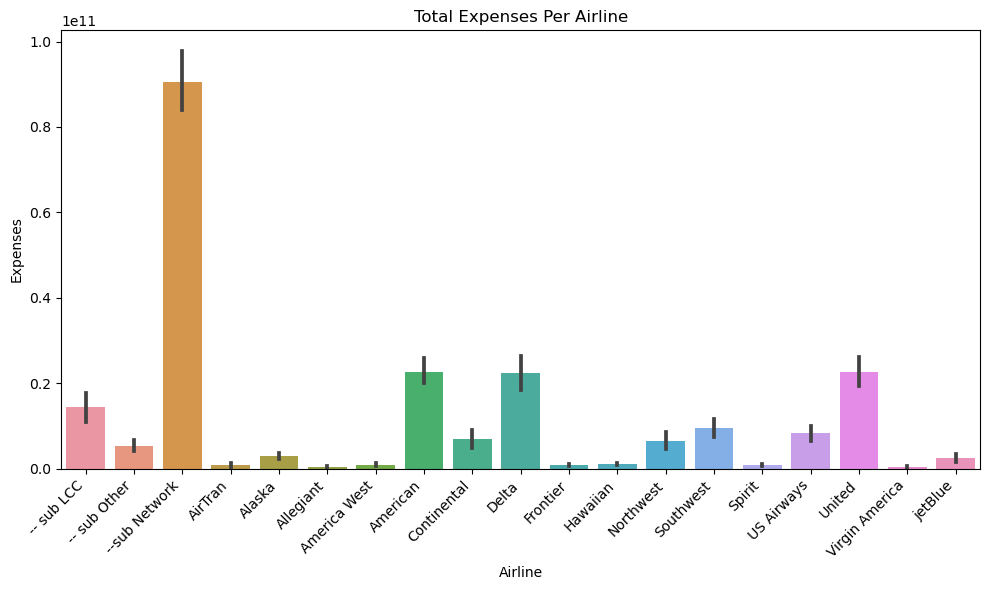

In [162]:
plt.figure(figsize = (10, 6))
sns.barplot(x='Airline', y='Expenses', data=expenses_per_airline)
plt.xticks(rotation=45, ha='right')
plt.title('Total Expenses Per Airline')
plt.xlabel('Airline')
plt.ylabel('Expenses')
plt.tight_layout()
plt.show()

In [74]:
# Transpose the dataframe 2

df2 = pd.melt(df2, id_vars = ['Year'], var_name = 'Airline', value_name = 'Passengers')

In [75]:
df2

,Year,Airline,Passengers
0,1995,American,79567182.0
1,1996,American,79387628.0
2,1997,American,81138330.0
3,1998,American,81476833.0
4,1999,American,81507894.0
...,...,...,...
451,2014,-- sub Other,53212845.0
452,2015,-- sub Other,60517675.0
453,2016,-- sub Other,67446643.0
454,2017,-- sub Other,73620215.0


In [142]:
passengers_per_airline = df2.groupby(['Year','Airline'])['Passengers'].sum().reset_index()

In [143]:
passengers_per_airline

,Year,Airline,Passengers
0,1995,-- sub Other,15743599.0
1,1995,--sub LCC,51260412.0
2,1995,--sub Network,403875982.0
3,1995,AirTran,497599.0
4,1995,Alaska,10139128.0
...,...,...,...
451,2018,Spirit,28683265.0
452,2018,US Airways,0.0
453,2018,United,113325432.0
454,2018,Virgin America,0.0


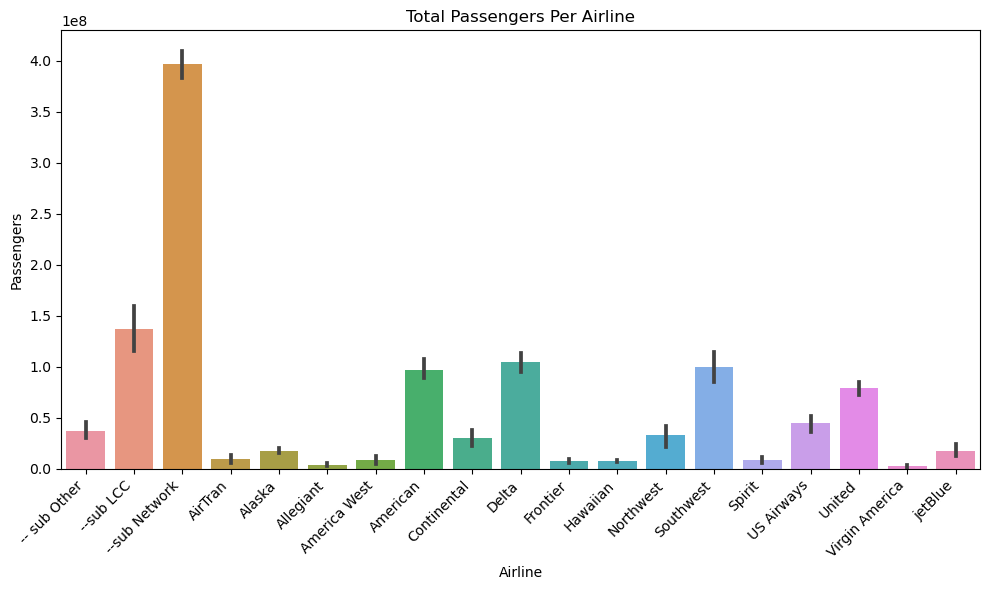

In [146]:
# Plot with Seaborn module

plt.figure(figsize = (10, 6))
sns.barplot(x='Airline', y='Passengers', data=passengers_per_airline)
plt.xticks(rotation=45, ha='right')
plt.title('Total Passengers Per Airline')
plt.xlabel('Airline')
plt.ylabel('Passengers')
plt.tight_layout()
plt.show()

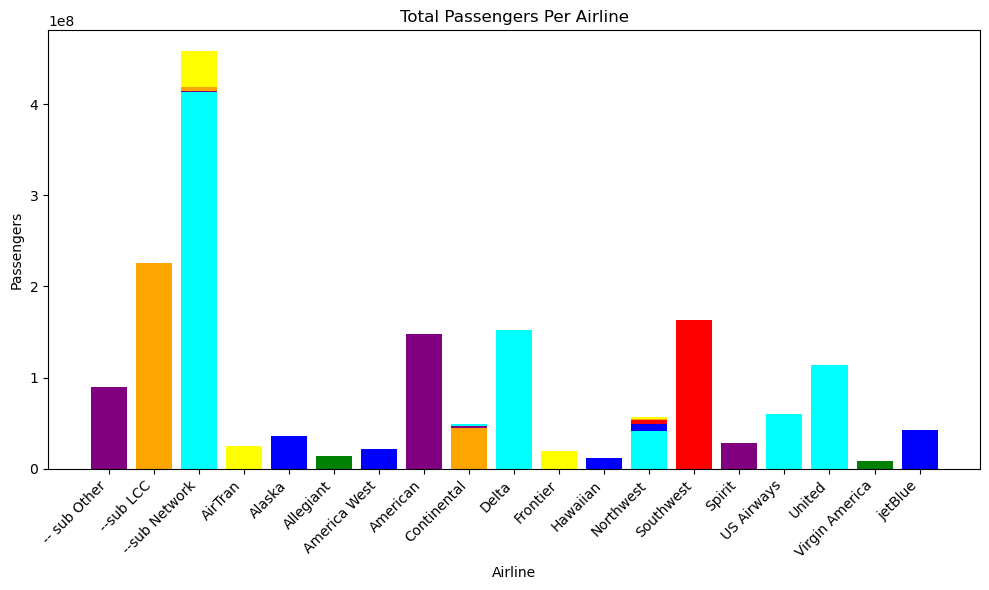

In [155]:
# Plot with Matplotlib.pyplot module

plt.figure(figsize=(10,6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan','yellow']
plt.bar(passengers_per_airline['Airline'], passengers_per_airline['Passengers'], color=colors[:len('Airlines')])
plt.xticks(rotation=45, ha='right')
plt.title('Total Passengers Per Airline')
plt.xlabel('Airline')
plt.ylabel('Passengers')
plt.tight_layout()
plt.show()

In [84]:
# Transpose the dataframe 3

df3 = pd.melt(df3, id_vars = ['Year'], var_name = 'Airline', value_name = 'Revenue')

In [85]:
df3

,Year,Airline,Revenue
0,1995,American,1.561020e+10
1,1996,American,1.513600e+10
2,1997,American,1.585580e+10
3,1998,American,1.629885e+10
4,1999,American,1.609026e+10
...,...,...,...
451,2014,-- sub Other,1.070580e+10
452,2015,-- sub Other,1.127021e+10
453,2016,-- sub Other,1.190865e+10
454,2017,-- sub Other,1.306705e+10


In [86]:
revenue_per_airline = df3.groupby(['Airline','Year'])['Revenue'].sum().reset_index()

In [87]:
revenue_per_airline

,Airline,Year,Revenue
0,-- sub LCC,1995,2.929332e+09
1,-- sub LCC,1996,3.516872e+09
2,-- sub LCC,1997,4.060918e+09
3,-- sub LCC,1998,4.725605e+09
4,-- sub LCC,1999,5.566603e+09
...,...,...,...
451,jetBlue,2014,5.816877e+09
452,jetBlue,2015,6.416127e+09
453,jetBlue,2016,6.632433e+09
454,jetBlue,2017,7.015326e+09


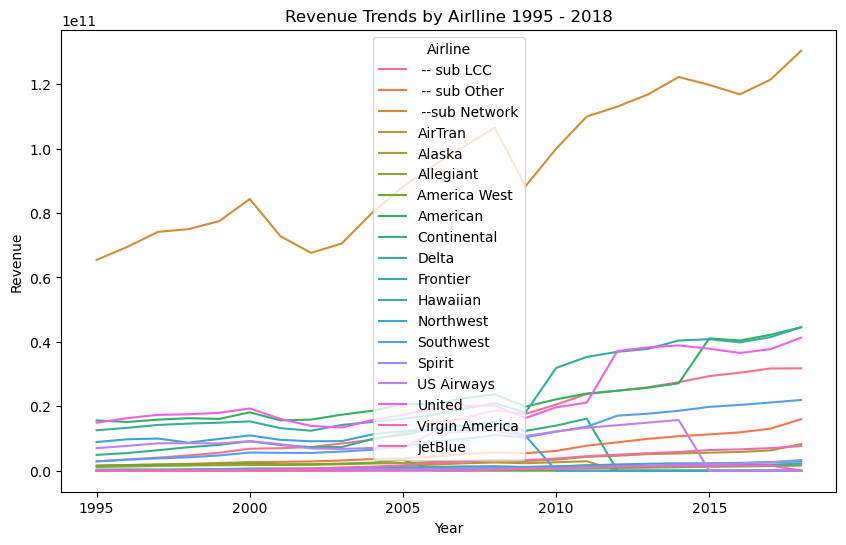

In [91]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Revenue', hue='Airline', data=revenue_per_airline)
plt.title('Revenue Trends by Airlline 1995 - 2018')
plt.show()

In [96]:
# Calculate the international yield for each year in df4
# ASM = Available Seat Miles

df4['International Yield'] = df4['Total Operating Revenue ($)']/df4['International ASM']

In [97]:
# Calculate the domestic yield for each year in df4
# ASM = Available Seat Miles

df4['Domestic Yield'] = df4['Total Operating Revenue ($)']/df4['Domestic ASM']

In [99]:
df4.drop(columns=['Yield'], inplace=True)

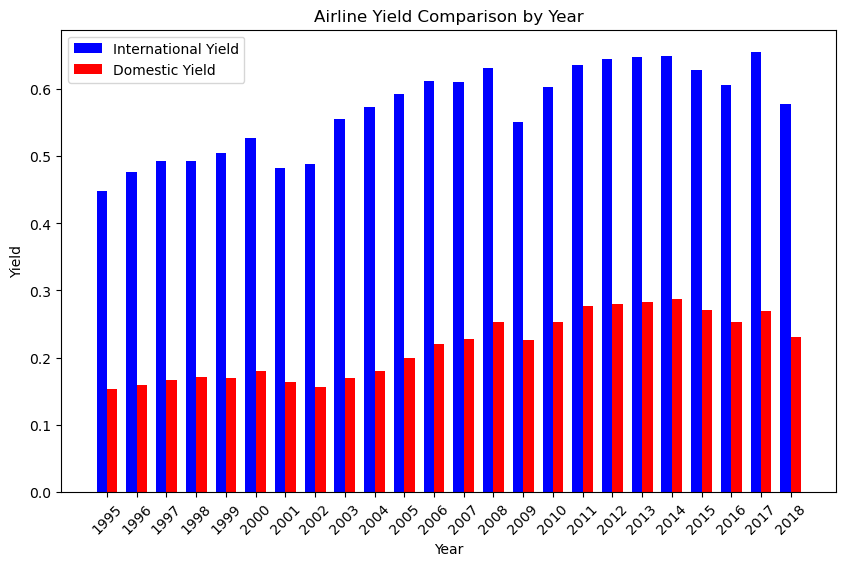

In [114]:
# Plot yield comparison

plt.figure(figsize=(10,6))

# Bar width
bar_width = 0.35

# Position of bars on x-axis
r1 = range(len(df4['Year']))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.bar(r1, df4['International Yield'], color = 'blue', width = bar_width, label = 'International Yield')
plt.bar(r2, df4['Domestic Yield'], color = 'red', width = bar_width, label = 'Domestic Yield')

# Adding x-axis labels and title 
plt.xlabel('Year')
plt.xticks([r + bar_width / 2 for r in range(len(df4['Year']))], df4['Year'], rotation=45)
plt.ylabel('Yield')
plt.title('Airline Yield Comparison by Year')

# Addinig legend 
plt.legend()

# Show plot
plt.show()


In [115]:
# Forecasting Strategies
# Focusing on a single airline's revenue for forecasting 

airline_data = df3[df3['Airline'] == 'Selected_Airline'].set_index('Year')

In [127]:
# Use only revenue column for time-series forecasting
airline_revenue = df3['Revenue']

In [129]:
train, test = train_test_split(airline_revenue, test_size = 0.2, shuffle=False)

In [133]:
# Build ARIMA Model

model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

In [135]:
# Forecasting the next 'n' steps (where 'n' is len(test))
forecast = model_fit.forecast(steps=len(test))

In [136]:
# Get confidence intervals
conf_int = model_fit.get_forecast(steps=len(test)).conf_int()

In [137]:
print(forecast)
print(conf_int)

364    4.265080e+08
365    6.178546e+08
366    6.099738e+08
367    6.055980e+08
368    6.088578e+08
           ...     
451    6.034451e+08
452    6.034451e+08
453    6.034451e+08
454    6.034451e+08
455    6.034451e+08
Name: predicted_mean, Length: 92, dtype: float64
     lower Revenue  upper Revenue
364  -1.732049e+10   1.817351e+10
365  -2.400932e+10   2.524503e+10
366  -2.915860e+10   3.037855e+10
367  -3.371104e+10   3.492223e+10
368  -3.766370e+10   3.888141e+10
..             ...            ...
451  -1.550794e+11   1.562863e+11
452  -1.559582e+11   1.571651e+11
453  -1.568321e+11   1.580390e+11
454  -1.577011e+11   1.589080e+11
455  -1.585655e+11   1.597724e+11

[92 rows x 2 columns]
